1. Importo las librerías q voy a necesitar


In [1]:
#Vamos a importar la librería numpy y la renombramos como np 
import numpy as np 
import math
from scipy.io.wavfile import read, write  #para leer, grabar archivos de audio formato wav
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift #tranformadas de fourier?
from scipy import signal #signal?



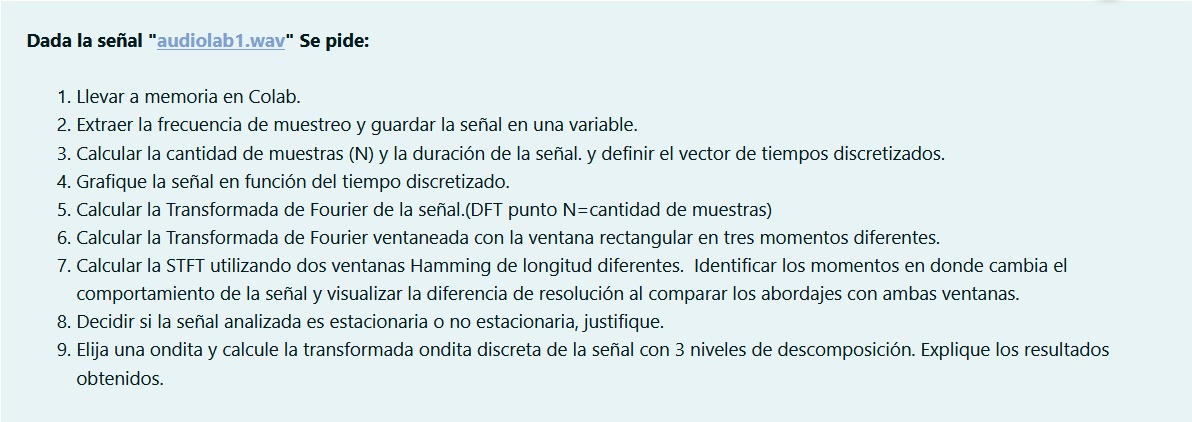

1.Cargo la señal

In [3]:
au1=read('audiolab1.wav')
print(au1)

(44100, array([[  1,   1],
       [  1,   1],
       [  1,   1],
       ...,
       [  3,   3],
       [ -8,  -8],
       [-13, -13]], dtype=int16))


2. Extraigo frecuencia de muestreo y guardo el audio en una variable


In [4]:
fm=au1[0] #frecuencia de muestreo

señal=au1[1][:,0] #audio en variable


print('la longitud del vector es: ',len(señal),
      '\n \nla frecuencia de muestreo es ',fm,'Hertz, es decir',fm,'muestras por segundo'
      '\n \ny el audio está guardado en el vector "señal": \n \n',señal)

# len(señal)

la longitud del vector es:  344053 
 
la frecuencia de muestreo es  44100 Hertz, es decir 44100 muestras por segundo
 
y el audio está guardado en el vector "señal": 
 
 [  1   1   1 ...   3  -8 -13]


3. Calculo cantidad de muestras, duración de la señal y vector tiempos

El audiolab1 tiene una duración de 7.801655328798186 segundos 
 
El audio tiene 344053 muestras 



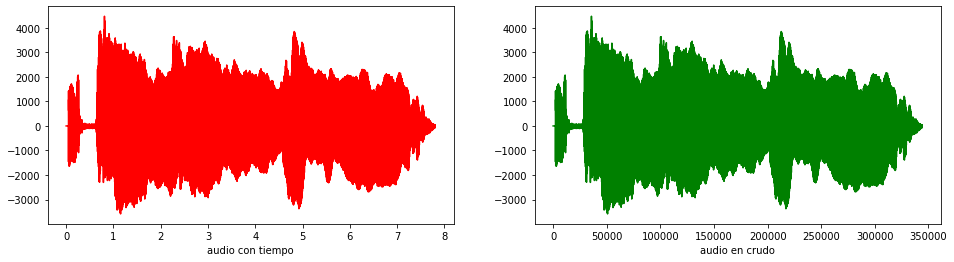

In [7]:
duracion=len(señal)/fm

N=len(señal)

# plt.plot(audio)
# plt.title('audio')
# plt.xlabel('muestras')
# plt.ylabel('voltaje')

print('El audiolab1 tiene una duración de',duracion,'segundos \n',
      '\nEl audio tiene',N,'muestras \n')


t=np.arange(N)/fm #vector de tiempos discretizados SI O SI CON ARANGE

# fig, axs=plt.subplots(1,2, figsize=(15,5) )
# axs[0].plot(t, señal ,color='r', label='Audio con tiempo',)
# axs[0].set_xlabel('audio con tiempo')
# axs[1].plot(señal,color='g', label='Audio en crudo',)
# axs[1].set_xlabel('audio en crudo')

plt.figure(figsize=(16,4))
plt.subplot(121),plt.plot(t, señal ,color='r', label='Audio con tiempo',),plt.xlabel('audio con tiempo')
plt.subplot(122),plt.plot(señal,color='g', label='Audio en crudo',),plt.xlabel('audio en crudo')
plt.show()

# axs[2].plot(v,señal,color='b',label='Audio en función del t discretizado')
# axs[2].set_xlabel('')
# plt.plot(t,señal)

4. Calculo la DFT.N (DFT.344053)

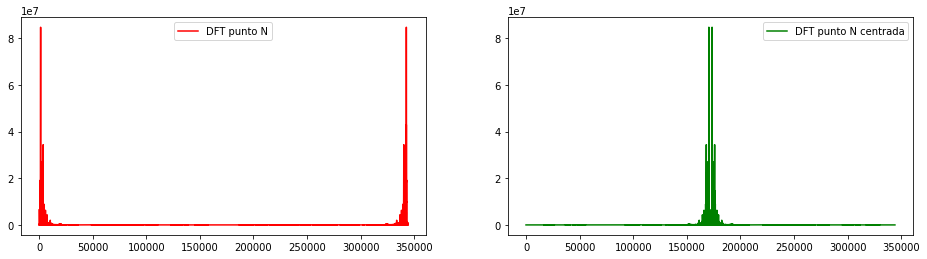

In [13]:
v=np.arange(N)
DFT=fft(señal,N)
DFTc=fftshift(DFT)
fn=fm//2 #frecuencia de nyquist
# fig, axs = plt.subplots(2, figsize=(15,15))
# axs[0].plot(v, abs(DFT), color='r', label='DFT punto N')
# axs[0].legend(loc='upper center')
# axs[1].plot(v,abs(DFTc),color='g',label='DFT punto N centrada')
# axs[1].legend(loc='upper right')
# # axs[0,1].plot(v, abs(TF2), color='red', label='TF Señal concatenada')
# # axs[0,1].legend(loc='upper right')
# plt.show()

plt.figure(figsize=(16,4))
plt.subplot(121),plt.plot(v, abs(DFT), color='r', label='DFT punto N'),plt.legend(loc='upper center')
plt.subplot(122),plt.plot(v, abs(DFTc), color='g', label='DFT punto N centrada'),plt.legend(loc='upper right')
plt.show()

6. Calculo la STFT ventaneada en 3 momentos diferentes


114684


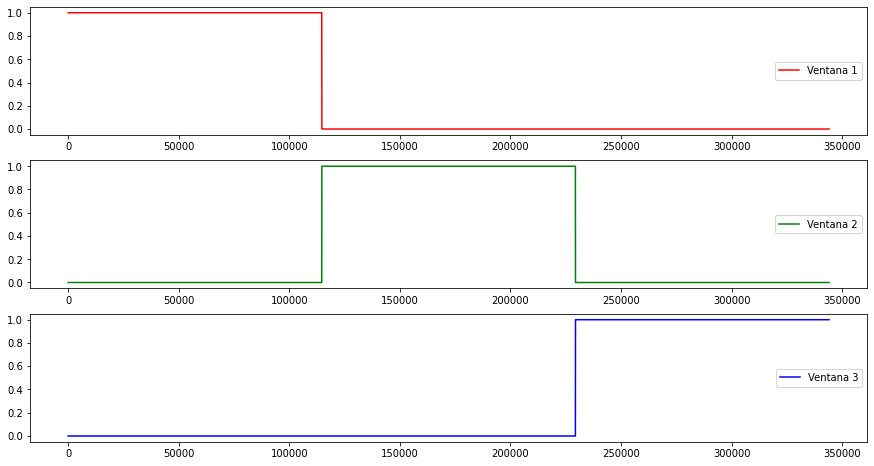

In [16]:
#ventana 1
tercio=N//3
win1 = np.zeros(N)
win1[0:tercio]= 1

# print(tercio)
#ventana 2
win2 = np.zeros(N)
win2[tercio:2*tercio]= 1

#ventana 3
win3 = np.zeros(N)
win3[2*tercio:N]= 1

#muestro las 3 ventanas
fig, axs=plt.subplots(3,figsize=(15,8))
axs[0].plot(win1, color='r', label='Ventana 1')
axs[0].legend(loc='center right')
axs[1].plot(win2, color='g', label='Ventana 2')
axs[1].legend(loc='center right')
axs[2].plot(win3, color='b', label='Ventana 3')
axs[2].legend(loc='center right')

# muestro todas juntas
# axs[3,0].plot(win1, color='r', label='Ventana 1')
# axs[3,0].plot(win2, color='g', label='Ventana 2')
# axs[3,0].plot(win3, color='b', label='Ventana 3')
# axs[3,0].legend(loc='center right')

#dft ventanas
# dwin1=fft(win1,N)
# axs[4].plot(dwin1, color='r', label='dft ventana 1')



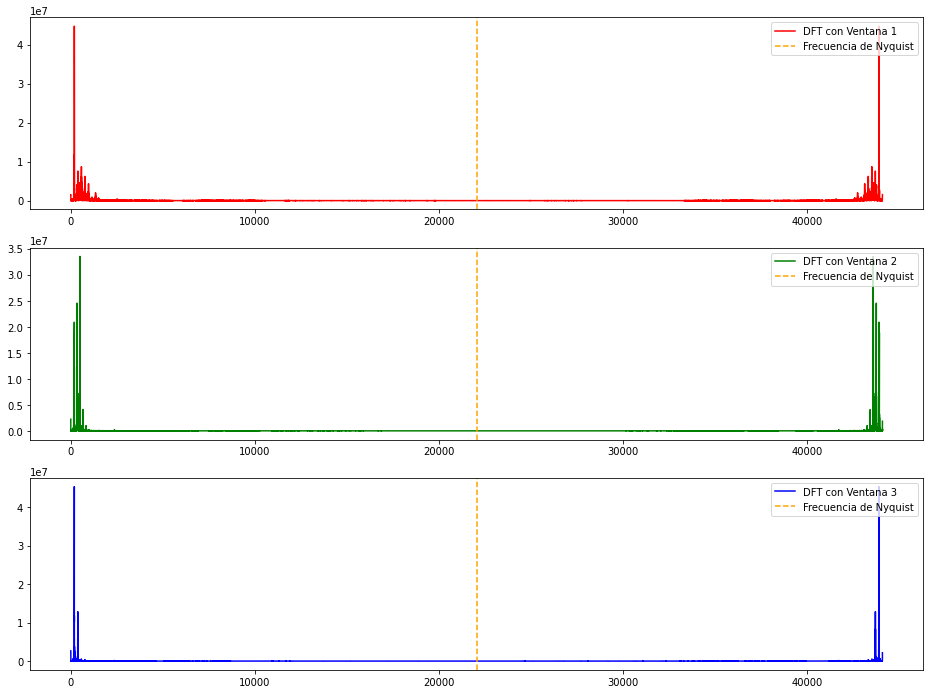

In [20]:
#ventaneo
TFv1 = fft(señal*win1,N)  #transfomada punto N
TFv2 = fft(señal*win2,N)  #transfomada punto N 
TFv3 = fft(señal*win3,N)  #transfomada punto N 

Frec_en_Hertzs=np.arange(N)/N*fm #normalizada a [0,FM),en [0, FN) está la información. Útil cuando se conoce la frecuencia de muestreo de la señal

#muestro con axs
# fig, axs=plt.subplots(3,figsize=(15,8))
# axs[0].plot(Frec_en_Hertzs,abs(TFv1), color='r', label='DFT con Ventana 1')
# axs[0].legend(loc='center right')
# axs[0].axvline(fn, color='orange',linestyle='--', label='Frecuencia de Nyquist')
# axs[0].legend(loc='upper right')

# axs[1].plot(Frec_en_Hertzs, abs(TFv2), color='g', label='DFT con Ventana 2')
# axs[1].legend(loc='center right')
# axs[1].axvline(fn, color='orange',linestyle='--', label='Frecuencia de Nyquist')
# axs[1].legend(loc='upper right')

# axs[2].plot(Frec_en_Hertzs, abs(TFv3), color='b', label='DFT con Ventana 3')
# axs[2].legend(loc='center right')
# axs[2].axvline(fn, color='orange',linestyle='--', label='Frecuencia de Nyquist')
# axs[2].legend(loc='upper right')

#muestro con subplot
plt.figure(figsize=(16,12))
#primer cuadro
plt.subplot(311),
plt.plot(Frec_en_Hertzs,abs(TFv1), color='r', label='DFT con Ventana 1'),
plt.legend(loc='center right'),
plt.axvline(fn, color='orange',linestyle='--', label='Frecuencia de Nyquist'),
plt.legend(loc='upper right')
#segundo cuadro
plt.subplot(312)
plt.plot(Frec_en_Hertzs, abs(TFv2), color='g', label='DFT con Ventana 2')
plt.legend(loc='center right')
plt.axvline(fn, color='orange',linestyle='--', label='Frecuencia de Nyquist')
plt.legend(loc='upper right')
#tercer cuadro
plt.subplot(313)
plt.plot(Frec_en_Hertzs, abs(TFv3), color='b', label='DFT con Ventana 3')
plt.legend(loc='center right')
plt.axvline(fn, color='orange',linestyle='--', label='Frecuencia de Nyquist')
plt.legend(loc='upper right')
plt.show()

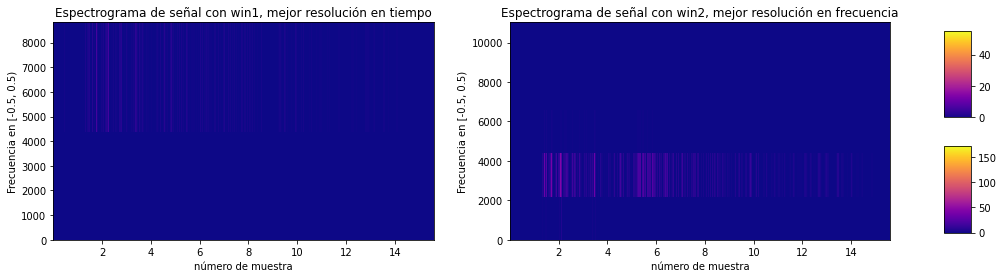

In [ ]:
#STFTs
fn=fm//2 #frecuencia de nyquist

frecn_q=np.linspace(-1 ,1,N, endpoint=False) #discretizamos las frecuencias en [-.5,.5)

h33=signal.hamming(5)
h501=signal.hamming(10)
f1, t1, Sxx1 = signal.spectrogram(señal,fs=fn, window=h33, noverlap=4) #espectograma
f2, t2, Sxx2 = signal.spectrogram(señal,fs=fn, window=h501, noverlap=5)
cmap='plasma' #elegimos el mapa o paleta de colores para graficar la matriz Espectrograma
#cmap='jet','PiYG', recomendados: 'plasma', 'magma','inferno',' viridis'
#grafico los espectogramas

fig, axs = plt.subplots(1,2,figsize=(15,4))

im1=axs[0].pcolormesh(t1, f1, Sxx1, cmap=cmap)
axs[0].set_title('Espectrograma de señal con win1, mejor resolución en tiempo')
axs[0].set_ylabel('Frecuencia en [-0.5, 0.5)')
axs[0].set_xlabel('número de muestra')


im2=axs[1].pcolormesh(t2, f2, Sxx2, cmap=cmap)
axs[1].set_title('Espectrograma de señal con win2, mejor resolución en frecuencia')
axs[1].set_ylabel('Frecuencia en [-0.5, 0.5)')
axs[1].set_xlabel('número de muestra')

fig.subplots_adjust(right=0.9)

cbar_ax = fig.add_axes([0.95, 0.55, 0.025, 0.3])
fig.colorbar(im1, cax=cbar_ax)

cbar_ax2 = fig.add_axes([0.95, 0.15, 0.025, 0.3])
fig.colorbar(im2, cax=cbar_ax2)




In [ ]:
#elegimos una ondita y calculamos la transformada con 3 niveles de descomposición
coef = pywt.wavedec(A, 'db1',level=3) #transformada ondita discreta de la señal A con 3 niveles de descomposición.

a3=coef[0]
d3=coef[1]
d2=coef[2]
d1=coef[3]

#visualizamos
fig, axs = plt.subplots(5,1,figsize=(10,20))
axs[0].plot(A, color='blue', label='Señal A')
axs[0].legend(loc='upper right')
axs[1].plot(a3, color='red', label='Aproximación nivel 3')
axs[1].legend(loc='upper right')
axs[2].plot(d3, color='green', label='Detalle nivel 3') 
axs[2].legend(loc='upper right')
axs[3].plot(d2, color='green', label='Detalle nivel 2') 
axs[3].legend(loc='upper right')
axs[4].plot(d1, color='green', label='Detalle nivel 1') 
axs[4].legend(loc='upper right')

# Si se aplica la DWT se obtiene la descomposición de la señal, en este caso, en 3 niveles. Se observa que con el paso de los niveles las señales
# van disminuyendo la longitud aproximadamente en un factor de 2
# Se nota que lasaproximación es idéntica a la señal estudiada pero los detalles en los distintos niveles son de una muy baja amplitud
# comparada con estas